- https://github.com/taehojo/deeplearning
- 5장. 선형회귀모델 : 먼저 긋고 수정하기

### 선형 회귀 모델 : 먼저 긋고 수정하기
- 앞서 기울기 a를 너무 크게 잡으면 오차가 커지는 것을 확인
- 기울기를 너무 작게 잡아도 오차가 커짐
- 기울기 a와 오차 사이에는 상관관계가 있음 = 이차 함수 관계
- 
- <img src = 'https://thebook.io/img/080324/080.jpg' width ='40%' height='40%'/>
- 기울기 a와 오차의 관계 : 적절한 기울기를 찾았을 때 오차가 최소화
- 그래프의 볼록한 부분에 이르렀을때 오차가 가장 적다
- 기울기 a가 m의 위치에 이르렀을때
- a1보다 a2보다 a3가 m에 가깝다는 것을 컴퓨터가 판단 = 경사 하강법(gradient decent)

### 경사하강법 개요
- <img src = 'https://thebook.io/img/080324/081.jpg' width ='40%' height='40%'/>
- 눈여겨보아야 할 것은 우리가 찾는 최솟값 m에서의 기울기
- 기울기가 0 = 미분 값이 0인 지점 을 찾는것
    1. a1에서 미분을 구한다
    2. 구한 기울기의 반대 방향으로 얼마간 이동시킨 a2에서 미분을 구한다
    3. 미분 값이 0이 아니면 과정 반복
- 
- <img src = 'https://thebook.io/img/080324/082_1.jpg' width ='40%' height='40%'/>
- 경사하강법은 반복적으로 기울기 a를 변화시켜서 m값을 찾아내는 방법
- 
- <img src = 'https://thebook.io/img/080324/082_2.jpg' width ='40%' height='40%'/>
- 학습률(learning rate)
- 기울기의 부호를 바꾸어 이동시킬 때 적절한 거리를 찾지 못해
- 너무 멀리 이동시키면 a값이 한 점으로 모이지 않고 그림처럼 치솟아 버림
- 따라서 어느만큼 이동시킬지 신중히 결정해야하는데 이동거리를 정해주는 것이 학습률
- 
- 경사하강법은 오차의 변화에 따라 이차함수 그래프를 만들고 적절한 학습률을 설정해 미분 값이 0인 지점을 구하는 것

### 파이썬 코딩으로 확인하는 선형 회귀
- 평균 제곱 오차의 식
- <img src = 'https://thebook.io/img/080324/fx-38.jpg' width ='40%' height='40%'/>
- 
- 여기서 yi = axi + b를 대입하면
- <img src = 'https://thebook.io/img/080324/fx-39.jpg' width ='40%' height='40%'/>
- 
- 우리가 궁금한 것은 a와 b
- 식 전체를 미분하는 것이 아니라 필요한 값을 중심으로 미분
- a와 b로 각각 편미분한 결과
- <img src = 'https://thebook.io/img/080324/fx-4.jpg' width ='40%' height='40%'/>
- <img src = 'https://thebook.io/img/080324/fx-5.jpg' width ='40%' height='40%'/>

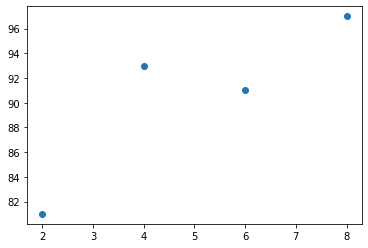

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


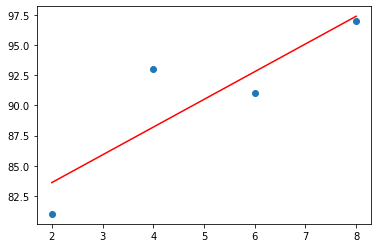

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 X와 성 y의 넘파이 배열을 만듭니다.
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
plt.scatter(x, y)
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a = 0
b = 0

# 학습률을 정합니다.
lr = 0.03

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다.
n = len(x)

# 경사 하강법을 시작합니다.
for i in range(epochs):      # 에포크 수만큼 반복합니다.
    y_pred = a * x + b       # 예측 값을 구하는 식입니다.
    error = y - y_pred       # 실제 값과 비교한 오차를 error로 놓습니다.

    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다.

    a = a - lr * a_diff   # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff   # 학습률을 곱해 기존의 b 값을 업데이트합니다.

    if i % 100 == 0:      # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        
# 앞서 구한 최종 a 값을 기울기, b 값을 y 절편에 대입해 그래프를 그립니다.
y_pred = a * x + b      

# 그래프를 출력합니다.
plt.scatter(x, y)
plt.plot(x, y_pred,'r')
plt.show()

### 다중 선형 회귀의 개요
- 더 정확한 예측을 하려면 변수 개수를 늘려 '다중 선형 회귀'를 만들어 줘야 함
- 독립변수 x1과 x2로 y를 만들 경우 기울기를 두개 구해야 하므로 다음 식이 나옴
- <img src = 'https://thebook.io/img/080324/fx-51.jpg' width ='40%' height='40%'/>

### 파이썬 코딩 : 다중 선형 회귀


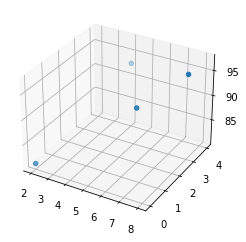

epoch=0, 기울기1=9.2800, 기울기2=4.2250, 절편=1.8100
epoch=100, 기울기1=9.5110, 기울기2=5.0270, 절편=22.9205
epoch=200, 기울기1=7.3238, 기울기2=4.2950, 절편=37.8751
epoch=300, 기울기1=5.7381, 기울기2=3.7489, 절편=48.7589
epoch=400, 기울기1=4.5844, 기울기2=3.3507, 절편=56.6800
epoch=500, 기울기1=3.7447, 기울기2=3.0608, 절편=62.4448
epoch=600, 기울기1=3.1337, 기울기2=2.8498, 절편=66.6404
epoch=700, 기울기1=2.6890, 기울기2=2.6962, 절편=69.6938
epoch=800, 기울기1=2.3653, 기울기2=2.5845, 절편=71.9160
epoch=900, 기울기1=2.1297, 기울기2=2.5032, 절편=73.5333
epoch=1000, 기울기1=1.9583, 기울기2=2.4440, 절편=74.7103
epoch=1100, 기울기1=1.8336, 기울기2=2.4009, 절편=75.5670
epoch=1200, 기울기1=1.7428, 기울기2=2.3695, 절편=76.1904
epoch=1300, 기울기1=1.6767, 기울기2=2.3467, 절편=76.6441
epoch=1400, 기울기1=1.6286, 기울기2=2.3301, 절편=76.9743
epoch=1500, 기울기1=1.5936, 기울기2=2.3180, 절편=77.2146
epoch=1600, 기울기1=1.5681, 기울기2=2.3092, 절편=77.3895
epoch=1700, 기울기1=1.5496, 기울기2=2.3028, 절편=77.5168
epoch=1800, 기울기1=1.5361, 기울기2=2.2982, 절편=77.6095
epoch=1900, 기울기1=1.5263, 기울기2=2.2948, 절편=77.6769
epoch=2000, 기울기1=1.5191, 기울기2=2.2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 공부 시간 x1과 과외 시간 x2, 성적 y의 넘파이 배열을 만듭니다.
x1 = np.array([2, 4, 6, 8])
x2 = np.array([0, 4, 2, 3])
y = np.array([81, 93, 91, 97])

# 데이터의 분포를 그래프로 나타냅니다.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y);
plt.show()

# 기울기 a의 값과 절편 b의 값을 초기화합니다.
a1 = 0
a2 = 0
b = 0

# 학습률을 정합니다.
lr = 0.01 

# 몇 번 반복될지 설정합니다.
epochs = 2001 

# x 값이 총 몇 개인지 셉니다. x1과 x2의 수가 같으므로 x1만 세겠습니다.
n = len(x1)

# 경사 하강법을 시작합니다.
for i in range(epochs):             # 에포크 수만큼 반복합니다.
    
    y_pred = a1 * x1 + a2 * x2 + b  # 예측 값을 구하는 식을 세웁니다.
    error = y - y_pred              # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a1_diff = (2/n) * sum(-x1 * (error))  # 오차 함수를 a1로 편미분한 값입니다.
    a2_diff = (2/n) * sum(-x2 * (error))  # 오차 함수를 a2로 편미분한 값입니다.
    b_diff = (2/n) * sum(-(error))        # 오차 함수를 b로 편미분한 값입니다.
    
    a1 = a1 - lr * a1_diff      # 학습률을 곱해 기존의 a1 값을 업데이트합니다.
    a2 = a2 - lr * a2_diff      # 학습률을 곱해 기존의 a2 값을 업데이트합니다.
    b = b - lr * b_diff         # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:   # 100번 반복될 때마다 현재의 a1, a2, b의 값을 출력합니다.
        print("epoch=%.f, 기울기1=%.04f, 기울기2=%.04f, 절편=%.04f" % (i, a1, a2, b))

# 실제 점수와 예측된 점수를 출력합니다.
print("실제 점수: ", y)
print("예측 점수: ", y_pred)

### 텐서플로 : 선형회귀, 다중선형회귀 모델
- 가설함수 H(x) : 머신 러닝에서 문제를 해결하기 위해 가정하는 식
- 가중치(weight) : 기울기 a
- 편향(bias) : 절편 b
- y = ax + b -> H(x) = wx + b
- 
- 손실 함수(loss function) : 평균 제곱 오차
- 옵티마이저(optimizer) : 경사하강법
- 